# Téléchargements des jeux de données


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sartajbhuvaji/brain-tumor-classification-mri")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/brain-tumor-classification-mri


In [ ]:
!pip install --upgrade keras-hub
!pip install --upgrade keras-hub-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.1/792.1 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: keras-hub
    Found existing installation: keras-hub 0.18.1
    Uninstalling keras-hub-0.18.1:
      Successfully uninstalled keras-hub-0.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-nlp 0.18.1 requires keras-hub==0.18.1, but you have keras-hub 0.20.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.4/842.4 kB 10.3 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-hub  # Installs the tensorflow-hub package, which includes keras_hub
import os
os.environ["KERAS_BACKEND"] = "jax"
import keras
import tensorflow_hub as hub  # Imports tensorflow_hub and renames it to 'hub' for consistency
import numpy as np
import tensorflow_datasets as tfds

# Téléchargement et extraction le dataset

In [ ]:
!mkdir -p ~/.kaggle
from google.colab import files

# Importer kaggle.json depuis votre PC
uploaded = files.upload()
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


# Téléchargement des images depuis Kaggle

In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri


Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT


# Décompression du fichier ZIP

In [ ]:
!unzip brain-tumor-classification-mri.zip -d /content/brain_tumor_data


Archive:  brain-tumor-classification-mri.zip
  inflating: /content/brain_tumor_data/Testing/glioma_tumor/image(1).jpg  
  inflating: /content/brain_tumor_data/Testing/glioma_tumor/image(10).jpg  
  inflating: /content/brain_tumor_data/Testing/glioma_tumor/image(100).jpg  
  inflating: /content/brain_tumor_data/Testing/glioma_tumor/image(11).jpg  
  inflating: /content/brain_tumor_data/Testing/glioma_tumor/image(12).jpg  
  inflating: /content/brain_tumor_data/Testing/glioma_tumor/image(13).jpg  
  inflating: /content/brain_tumor_data/Testing/glioma_tumor/image(14).jpg  
  inflating: /content/brain_tumor_data/Testing/glioma_tumor/image(15).jpg  
  inflating: /content/brain_tumor_data/Testing/glioma_tumor/image(16).jpg  
  inflating: /content/brain_tumor_data/Testing/glioma_tumor/image(17).jpg  
  inflating: /content/brain_tumor_data/Testing/glioma_tumor/image(18).jpg  
  inflating: /content/brain_tumor_data/Testing/glioma_tumor/image(19).jpg  
  inflating: /content/brain_tumor_data/Test

# Vérification de la structure du dataset

**Explorer la structure des fichiers et analyser la distribution des classes.**

In [ ]:
import os

# Définition du chemin vers le dossier d'entraînement
data_dir = "/content/brain_tumor_data/Training"

# Vérifier si le dossier existe avant de l'utiliser
if os.path.exists(data_dir):
    print(f" Le répertoire '{data_dir}' existe.")
    classes = os.listdir(data_dir)  # Lister les sous-dossiers
    print("Classes trouvées :", classes)
else:
    print(f" Le répertoire '{data_dir}' n'existe pas. Vérifiez le chemin.")


 Le répertoire '/content/brain_tumor_data/Training' existe.
Classes trouvées : ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


# Compter le nombre d'images par classe

In [ ]:
# Calculer le nombre d'images dans chaque classe
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in classes}
print("Répartition des classes :", class_counts)


Répartition des classes : {'glioma_tumor': 826, 'meningioma_tumor': 822, 'no_tumor': 395, 'pituitary_tumor': 827}


*   On liste les catégories (glioma_tumor,meningioma_tumor, no_tumor, pituitary_tumor).

*  On compte le nombre d’images par classe.



# Affichage des images du dataset

**Voir quelques exemples d’IRM pour mieux comprendre les données.**

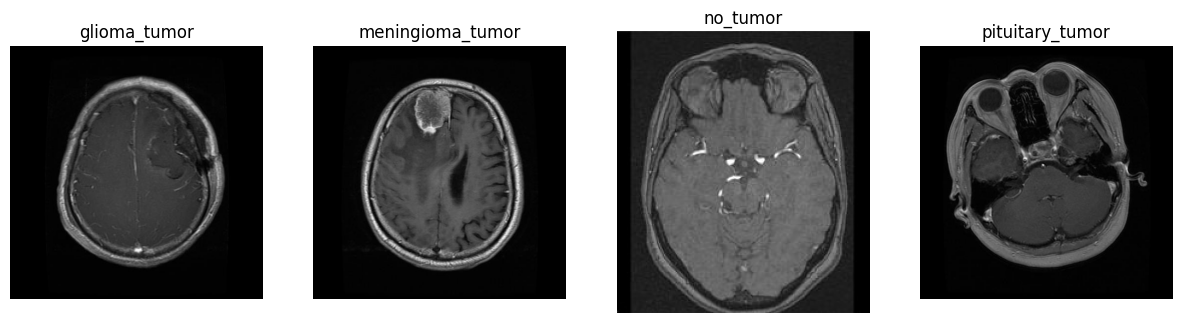

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Créer une figure avec 4 images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Parcourir les 4 premières classes et afficher une image de chaque
for i, cls in enumerate(classes[:4]):
    img_path = os.path.join(data_dir, cls, os.listdir(os.path.join(data_dir, cls))[0])  # Prendre une image au hasard
    img = Image.open(img_path)  # Ouvrir l'image
    axes[i].imshow(img)  # Afficher l'image
    axes[i].set_title(cls)  # Ajouter un titre (nom de la classe)
    axes[i].axis('off')  # Enlever les axes

plt.show()



*   On charge 4 images aléatoires et on les affiche avec leur catégorie.



# Chargement des images et création des ensembles d'entrainement et validation

**Convertir les images en format exploitable pour l’IA.**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Définir la taille des images et le batch size
img_size = (224, 224)
batch_size = 32

# Appliquer une normalisation aux images et séparer en ensemble d'entraînement/validation
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

# Chargement des images pour l'entraînement
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # 80% des images
)

# Chargement des images pour la validation
val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # 20% des images
)


Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.


*   On redimensionne les images à 224x224 pixels.

*  On normalise les pixels pour qu’ils soient entre 0 et 1.

*  On divise les données en entraînement (80%) et validation (20%).

# Construction et création d'un modèle : modèle de classification basé sur EfficientNetB0

**Créer un modèle capable de détecter les tumeurs cérébrales.**

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# Charger le modèle pré-entraîné EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # On ne réentraîne pas les couches de base

# Ajouter des couches personnalisées pour adapter le modèle à notre problème
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(classes), activation='softmax')(x)  # Softmax pour la classification multi-classe

# Définir le modèle final
model = Model(inputs=base_model.input, outputs=output)

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Afficher le résumé du modèle
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

*  On utilise EfficientNetB0, un modèle d’IA pré-entraîné sur ImageNet.

*  On ajoute une couche finale adaptée aux 4 catégories du dataset.

*  On compil le modèle avec Adam et une perte categorical_crossentropy.



# Entrainement du modèle avec 10 époques

**Faire apprendre l’IA à détecter les tumeurs.**

In [ ]:
# Entraînement du modèle avec 10 époques
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    verbose=1
)


Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1517s 21s/step - accuracy: 0.2806 - loss: 1.3904 - val_accuracy: 0.2880 - val_loss: 1.3517
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1463s 20s/step - accuracy: 0.2866 - loss: 1.3618 - val_accuracy: 0.2880 - val_loss: 1.3501
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1472s 21s/step - accuracy: 0.2882 - loss: 1.3539 - val_accuracy: 0.2862 - val_loss: 1.3489
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 1475s 21s/step - accuracy: 0.2865 - loss: 1.3512 - val_accuracy: 0.2880 - val_loss: 1.3484
Epoch 5/10
19/72 ━━━━━━━━━━━━━━━━━━━━ 14:25 16s/step - accuracy: 0.3097 - loss: 1.3636



*  On entraîne le modèle sur 10 époques.
*  On surveille l’évolution de la précision et de l’erreur.



**Sauvegarder le modèle pour l’utiliser plus tard.**

In [ ]:
import keras
keras.saving.save_model(model, "brain_tumor_model.keras")


*  On sauvegarde en format .keras pour éviter les problèmes de compatibilité.

# Affichage des courbes d'entraînement et de validation

In [ ]:
import matplotlib.pyplot as plt

# Définition du graphique
plt.figure(figsize=(8, 5))

# Affichage des courbes avec styles améliorés
plt.plot(history.history['accuracy'], label='Entraînement', color='blue', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation', color='orange', linestyle='-', marker='s')

# Ajout des détails visuels
plt.xlabel("Époques")
plt.ylabel("Précision")
plt.title("Courbe d'apprentissage du modèle")
plt.legend()
plt.grid(True)

# Affichage
plt.show()


In [ ]:
!ls /content/brain_tumor_data/Testing/



glioma_tumor  meningioma_tumor	no_tumor  pituitary_tumor


# Les images disponibles

In [ ]:
!ls /content/brain_tumor_data/Testing/glioma_tumor | head -n 5


image(100).jpg
image(10).jpg
image(11).jpg
image(12).jpg
image(13).jpg


# Vérifier si l’IA prédit correctement sur une image inconnue.

In [ ]:
import os

# Définir le chemin correct de l’image test
test_image_name = "image(10).jpg"  # Vous pouvez changer pour une autre image
img_path = f"/content/brain_tumor_data/Testing/glioma_tumor/{test_image_name}"

# Vérifier que le fichier existe bien
if os.path.exists(img_path):
    print(f" Image sélectionnée : {img_path}")
else:
    print(" L'image n'existe pas ! Vérifiez le chemin.")


 Image sélectionnée : /content/brain_tumor_data/Testing/glioma_tumor/image(10).jpg


# Visualisation de la prédiction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


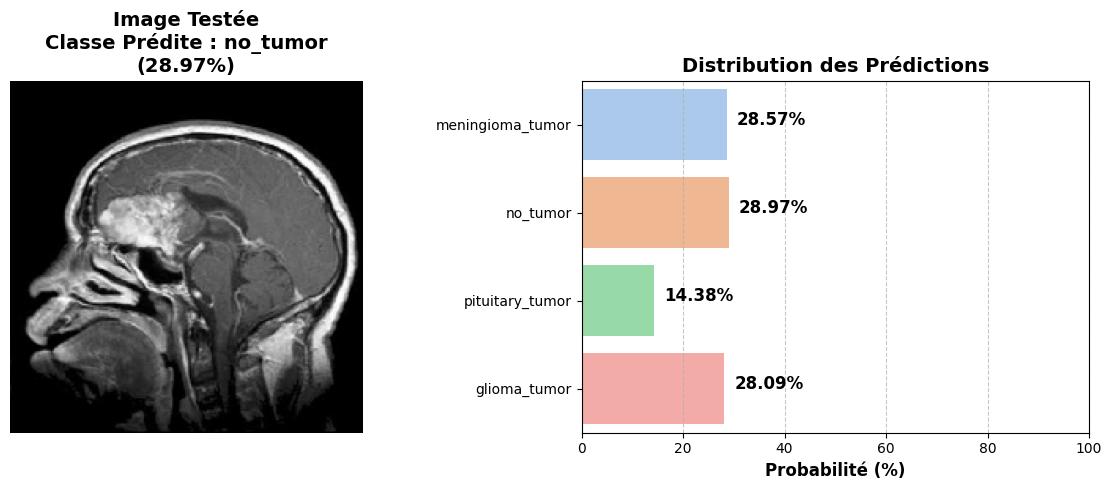

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing import image

# Charger et prétraiter l'image
img = image.load_img(img_path, target_size=(224, 224))
img_array = np.expand_dims(np.array(img) / 255.0, axis=0)

# Faire la prédiction
prediction = model.predict(img_array)
predicted_class = classes[np.argmax(prediction)]
predicted_prob = np.max(prediction) * 100  # Probabilité la plus haute

# Création de la figure
plt.figure(figsize=(12, 5))

#  Sous-graphique 1 : Afficher l’image testée
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title(f"Image Testée\nClasse Prédite : {predicted_class}\n({predicted_prob:.2f}%)",
          fontsize=14, fontweight="bold")
plt.axis("off")  # Supprimer les axes

#  Sous-graphique 2 : Afficher les probabilités sous forme de barres
plt.subplot(1, 2, 2)

# Définir des couleurs plus harmonieuses
colors = sns.color_palette("pastel", len(classes))

# Affichage du barplot avec des couleurs fixes
sns.barplot(x=prediction[0] * 100, y=classes, hue=classes, palette=colors, legend=False)

# Ajouter des annotations sur chaque barre
for index, value in enumerate(prediction[0] * 100):
    plt.text(value + 2, index, f"{value:.2f}%", fontsize=12, fontweight="bold", color="black")

# Améliorer l'axe des X et des titres
plt.xlabel("Probabilité (%)", fontsize=12, fontweight="bold")
plt.title("Distribution des Prédictions", fontsize=14, fontweight="bold")
plt.xlim(0, 100)  # Limiter l’axe des X entre 0 et 100
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Ajout de grilles légères

# Ajustement de la mise en page
plt.tight_layout()

# Affichage final
plt.show()
